In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/"

In [4]:
import pandas as pd

In [67]:
with open(path + "Twitter_Gender_Cleaned_1108.csv", encoding="latin1", errors='ignore') as f:
  twitter_data = pd.read_csv(f)

In [68]:
twitter_data = twitter_data[twitter_data["gender"] != "brand"]
twitter_data = twitter_data[twitter_data["gender"] != "unknown"]

In [69]:
import numpy as np 
import pandas as pd 
from sklearn.naive_bayes import MultinomialNB
import nltk
import re

In [7]:
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
import seaborn as sns

In [10]:
import nltk # natural language took kit
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [48]:
twitter_data.head(5)

,Unnamed: 0,Unnamed: 0.1,_unit_id,gender,description,fav_number,retweet_count,text,tweet_count,detect,Tweets,Description,gender_label,compound_vader,vader_sentiment
0,0,0,815719226,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,en,"['robbie', 'e', 'responds', 'critics', 'win', ...","['sing', 'rhythm']",1,0.3818,positive
1,1,1,815719227,male,I'm the author of novels filled with family dr...,68,0,ÂÃÃIt felt like they were my friends and I ...,7471,en,"['Ã»Ã¯it', 'felt', 'like', 'friends', 'living'...","['author', 'novels', 'filled', 'family', 'dram...",1,0.6808,positive
2,2,2,815719228,male,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617,en,"['absolutely', 'adore', 'louis', 'starts', 'so...","['louis', 'whining', 'squealing']",1,0.7267,positive
3,3,3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,en,"['hi', 'jordanspieth', 'looking', 'url', 'use'...","['mobile', 'guy', 'ers', 'shazam', 'google', '...",1,0.3786,positive
4,4,4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,en,"['watching', 'neighbours', 'sky', 'catching', ...","['ricky', 'wilson', 'best', 'frontman', 'kaise...",2,0.0000,neutral


In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

def v_sent(text):
    return sent.polarity_scores(text)['compound']

# new col
twitter_data['compound_vader'] = twitter_data['text'].apply(v_sent)

def sent_score(sentiment, negative_thres=-0.05, positive_thres=0.05):
    if sentiment < negative_thres:
        score = 'negative'
    elif sentiment > positive_thres:
        score = 'positive'
    else:
        score = 'neutral'
    return score

# new col
twitter_data['vader_sentiment'] = twitter_data['compound_vader'].apply(sent_score)

"\n# plot distribution of article sentiments for each newspaper\nplt.figure(figsize=(8,8))\nsns.countplot(x='Tweets', data=twitter_data, hue='vadar sentiment')\nplt.title('VADAR Sentiment Analysis', weight='bold')\nplt.ylabel('Number of Articles', fontsize=10, weight='bold')\nplt.xlabel('VADAR Sentiment', fontsize=10, weight='bold')\nplt.legend(bbox_to_anchor=(1.02, 1.0), loc=2, borderaxespad=0.0)\nplt.show()\n"

<function matplotlib.pyplot.show(*args, **kw)>

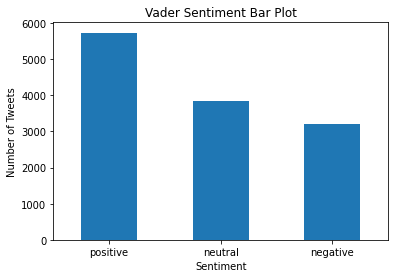

In [98]:
twitter_data['vader_sentiment'].value_counts().plot(kind='bar')
plt.title('Vader Sentiment Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.savefig("vader_sentiment_bar.png")
plt.show

In [71]:
from textblob import TextBlob

#Subjectivity - tells how subjective or opiniative the text is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Polarity - tells how positive otr negative the text is
#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
twitter_data['textblob_subjectivity'] = twitter_data['text'].apply(getSubjectivity)
twitter_data['textblob_polarity'] = twitter_data['text'].apply(getPolarity)


In [24]:
twitter_data.head(5)

,Unnamed: 0,Unnamed: 0.1,_unit_id,gender,description,fav_number,retweet_count,text,tweet_count,detect,Tweets,Description,gender_label,compound_vader,vader_sentiment,textblob_subjectivity,textblob_polarity
0,0,0,815719226,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,en,"['robbie', 'e', 'responds', 'critics', 'win', ...","['sing', 'rhythm']",1,0.3818,positive,0.400000,0.800000
1,1,1,815719227,male,I'm the author of novels filled with family dr...,68,0,ÂÃÃIt felt like they were my friends and I ...,7471,en,"['Ã»Ã¯it', 'felt', 'like', 'friends', 'living'...","['author', 'novels', 'filled', 'family', 'dram...",1,0.6808,positive,0.000000,0.000000
2,2,2,815719228,male,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617,en,"['absolutely', 'adore', 'louis', 'starts', 'so...","['louis', 'whining', 'squealing']",1,0.7267,positive,0.680556,0.202778
3,3,3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,en,"['hi', 'jordanspieth', 'looking', 'url', 'use'...","['mobile', 'guy', 'ers', 'shazam', 'google', '...",1,0.3786,positive,0.550000,0.166667
4,4,4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,en,"['watching', 'neighbours', 'sky', 'catching', ...","['ricky', 'wilson', 'best', 'frontman', 'kaise...",2,0.0000,neutral,0.900000,0.937500


In [75]:
gender1_male = twitter_data.loc[twitter_data['gender_label'] == 1]

In [ ]:
gender2_female = twitter_data.loc[twitter_data['gender_label'] == 2]

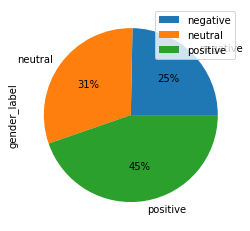

In [97]:
gender1_male.groupby(['vader_sentiment']).sum().plot(kind='pie', y='gender_label', autopct='%1.0f%%')
plt.savefig("vader_sentiment_pie_male.png")

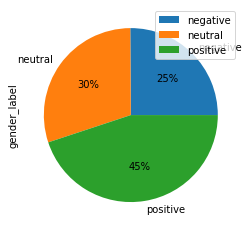

In [96]:
twitter_data.groupby(['vader_sentiment']).sum().plot(kind='pie', y='gender_label', autopct='%1.0f%%')
plt.savefig("vader_sentiment_pie_all.png")

<function matplotlib.pyplot.show(*args, **kw)>

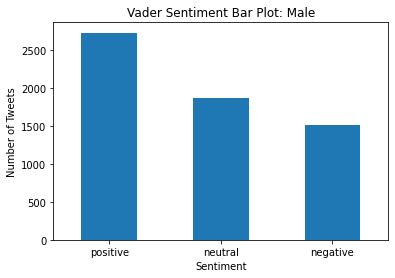

In [34]:
gender1_male['vader_sentiment'].value_counts().plot(kind='bar')
plt.title('Vader Sentiment Bar Plot: Male')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show

In [61]:
twitter_data['vader_sentiment'].replace(['positive', 'negative', 'neutral'],
                        [1, 0, .01], inplace=True)

In [41]:
twitter_data.head(5)


,Unnamed: 0,Unnamed: 0.1,_unit_id,gender,description,fav_number,retweet_count,text,tweet_count,detect,Tweets,Description,gender_label,compound_vader,vader_sentiment,textblob_subjectivity,textblob_polarity
0,0,0,815719226,male,i sing my own rhythm.,0,0,Robbie E Responds To Critics After Win Against...,110964,en,"['robbie', 'e', 'responds', 'critics', 'win', ...","['sing', 'rhythm']",1,0.3818,1,0.400000,0.800000
1,1,1,815719227,male,I'm the author of novels filled with family dr...,68,0,ÂÃÃIt felt like they were my friends and I ...,7471,en,"['Ã»Ã¯it', 'felt', 'like', 'friends', 'living'...","['author', 'novels', 'filled', 'family', 'dram...",1,0.6808,1,0.000000,0.000000
2,2,2,815719228,male,louis whining and squealing and all,7696,1,i absolutely adore when louis starts the songs...,5617,en,"['absolutely', 'adore', 'louis', 'starts', 'so...","['louis', 'whining', 'squealing']",1,0.7267,1,0.680556,0.202778
3,3,3,815719229,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,0,Hi @JordanSpieth - Looking at the url - do you...,1693,en,"['hi', 'jordanspieth', 'looking', 'url', 'use'...","['mobile', 'guy', 'ers', 'shazam', 'google', '...",1,0.3786,1,0.550000,0.166667
4,4,4,815719230,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,0,Watching Neighbours on Sky+ catching up with t...,31462,en,"['watching', 'neighbours', 'sky', 'catching', ...","['ricky', 'wilson', 'best', 'frontman', 'kaise...",2,0.0000,0,0.900000,0.937500


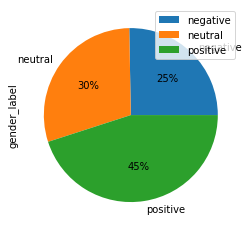

In [92]:
gender2_female.groupby(['vader_sentiment']).sum().plot(kind='pie', y='gender_label', autopct='%1.0f%%')
plt.savefig("vader_sentiment_pie_female.png")

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


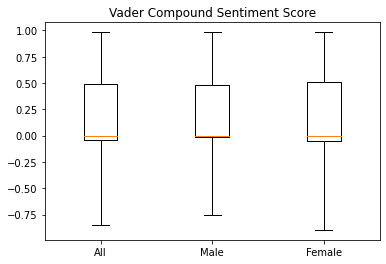

In [94]:
data1 = twitter_data['compound_vader']
data2 = gender1_male['compound_vader']
data3 = gender2_female['compound_vader']

data = [data1, data2, data3]

fig1, ax1 = plt.subplots()
ax1.set_title("Vader Compound Sentiment Score")
ax1.set_xticklabels(("All", "Male", "Female"))
ax1.boxplot(data, showfliers=False)
plt.savefig("vader_compound_sentiment.png")
plt.show()


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


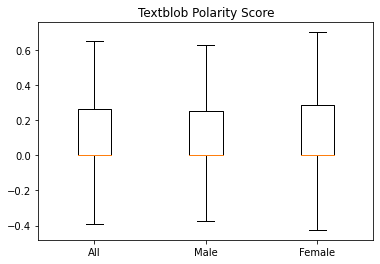

In [95]:
data1 = twitter_data['textblob_polarity']
data2 = gender1_male['textblob_polarity']
data3 = gender2_female['textblob_polarity']

data = [data1, data2, data3]

fig1, ax1 = plt.subplots()
ax1.set_title("Textblob Polarity Score")
ax1.set_xticklabels(("All", "Male", "Female"))
ax1.boxplot(data, showfliers=False)
plt.savefig("textblob_polarity_score.png")
plt.show()

In [ ]:
gender2_female['sentiment'].value_counts()

positive    2966
neutral     1956
negative    1666
Name: sentiment, dtype: int64